In [1]:
# -*- coding: utf-8 -*-
"""
Complete this code for combinatorial optimization  problem

Please remove author name if generated by machine automatically
Keep you code anonymous

"""

# Use standard python package only.
import random 
import math
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# MINIMUM GLOBAL VARIABLES TO BE USED
POPULATION_SIZE = 10   # Change POPULATION_SIZE to obtain better fitness.
GENERATIONS = 20  # Change GENERATIONS to obtain better fitness.
CHROMOSOME_SIZE = 15

CROSSOVER_RATE = 0.8 # Change CROSSOVER_RATE  to obtain better fitness.
MUTATION_RATE = 0.002 # Change MUTATION_RATE to obtain better fitness.

In [3]:
def max_min_solution(chromosome_size):
    #generate a target of ones or zeros
    one = np.random.randint(2)
    if one == 0:
        population = np.zeros(chromosome_size, dtype = np.int8)
    else:
        population = np.ones(chromosome_size, dtype = np.int8)
        
    return population

In [4]:
def generate_population(population_size, chromosome_size):
    #generate a population of just ones or zeros
    return np.random.randint(2, size = (population_size, chromosome_size))

In [5]:
def compute_fitness(max_min_solution, population):
    #calculate fitness 
    solution_to_population = population == max_min_solution
    
    fitness1 = solution_to_population.sum(axis = 1)

    #Calculate the fitness sum(n)
    return fitness1

In [6]:
def tournament_selection(population, fitness_score):
    #get the population size
    fitness_selection = len(fitness_score)

    #select two random individuals to fight in a tounament 
    player1 = random.randint(0, fitness_selection - 1)
    player2 = random.randint(0, fitness_selection - 1)

    #calculate the fitness scores for each player
    player1_fitness = fitness_score[player1]
    player2_fitness = fitness_score[player2]
    
    #Who ever has the grater fitness wins the tounament
    if player1_fitness >= player2_fitness:
        winner = player1
    else:
        winner = player2

    return population[winner, :]

In [7]:
def crossover(first_parent, second_parent, crossover_rate):
    #generate a random value to see if crossoveroccurs
    random_crossover = np.random.random_sample()
    #if run if crossover occurs
    if crossover_rate >= random_crossover:
           
        #get the indivudials size
        individual = len(first_parent)
        #get a crossover point to preform a crossover 
        crossover_point = random.randint(1, individual - 1)
    
        first_child = np.hstack((first_parent[0:crossover_point], second_parent[crossover_point: ]))
        second_child = np.hstack((second_parent[0:crossover_point], first_parent[crossover_point: ]))
    #if crossover doesnt occure then parents move to next gen
    else:
        first_child = first_parent
        second_child = second_parent
    
    return first_child, second_child

In [8]:
def mutation(population, mutation_rate):
    
    #generate a random value to see if crossover occurs 
    mutation = np.random.random(size = (population.shape)) <= mutation_rate
    #if mutation occurs change bit from 1 to 0 or 0 to 1
    population[mutation] = np.logical_not(population[mutation])    
        
    return population

In [9]:
def next_generation(next_gen, first_child, second_child):
    #store children in next gen
    next_gen.append(first_child)
    next_gen.append(second_child)

    return next_gen

complete code for a combinitorial optimization problem:
target:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Stating pop:  [[0 1 0 0 1 0 1 0 1 0 1 0 1 1 0]
 [0 1 0 0 0 1 1 0 0 1 1 0 1 0 0]
 [0 0 1 0 1 1 1 0 0 1 0 1 1 1 1]
 [0 1 0 1 0 0 0 0 1 1 0 0 1 1 0]
 [0 0 1 1 1 0 0 0 0 1 1 0 1 0 1]
 [0 1 0 0 0 0 0 0 1 0 1 1 1 1 0]
 [0 0 1 1 1 0 1 0 1 0 0 1 0 1 1]
 [0 1 1 1 1 0 1 0 0 0 1 1 1 0 1]
 [1 0 0 1 1 1 0 0 0 0 1 0 0 0 0]
 [1 1 0 0 0 1 1 0 0 1 0 1 0 0 0]]
fitness:  [ 8  9  6  9  8  9  7  6 10  9]
population:  [[1 0 0 1 1 1 0 0 0 0 1 0 0 0 0]
 [1 1 0 0 0 1 1 0 0 1 0 1 0 0 0]
 [0 1 0 1 0 0 0 0 1 1 0 0 1 1 0]
 [0 1 0 0 0 1 1 0 0 1 1 0 1 0 0]
 [0 1 0 1 1 1 0 0 0 0 1 0 0 0 0]
 [1 0 0 1 0 0 0 0 1 1 0 0 1 1 0]
 [0 1 0 0 1 0 1 0 1 0 1 0 1 1 0]
 [0 0 1 1 1 0 1 0 1 0 0 1 0 1 1]
 [0 1 0 0 0 1 1 0 0 1 1 0 1 1 0]
 [0 1 0 1 0 0 0 0 1 1 0 0 1 1 0]]
fitness:  [10  9  9  9 10  9  8  7  8  9]
population:  [[0 1 0 1 0 0 0 0 1 1 0 0 1 1 0]
 [1 0 0 1 0 0 0 0 1 1 0 0 1 1 0]
 [0 1 0 1 0 0 0 0 1 1 0 0 1 1 0]
 [1 0 0 1 0 0 0 0 

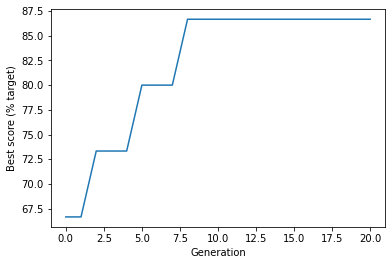

In [10]:
def main():
    print('complete code for a combinitorial optimization problem:')

    global CHROMOSOME_SIZE
    global POPULATION_SIZE 
    global GENERATIONS
    global MUTATION_RATE
    score_tracker = []
    
    # Set up and score population
    max_min = max_min_solution(CHROMOSOME_SIZE)
    
    population = generate_population(POPULATION_SIZE, CHROMOSOME_SIZE)
     
    #for individual in population:
    fitness_scores = compute_fitness(max_min, population)
    print('target: ', max_min)
    print('Stating pop: ', population)
    print('fitness: ', fitness_scores)
    
    bestscore = np.max(fitness_scores)/CHROMOSOME_SIZE * 100
    #track the best score 
    score_tracker.append(bestscore)
    
    for generation in range(GENERATIONS):
        new_population = []
        
        for i in range(int(POPULATION_SIZE/2)):
            first_parent = tournament_selection(population, fitness_scores)
            second_parent = tournament_selection(population, fitness_scores)

            first_child, second_child = crossover(first_parent, second_parent, CROSSOVER_RATE)

            new_population = next_generation(new_population, first_child, second_child)
            
        population = np.array(new_population)
        
        population = mutation(population, MUTATION_RATE)
        
        fitness_scores = compute_fitness(max_min, population)
        
        bestscore = np.max(fitness_scores)/CHROMOSOME_SIZE * 100
        score_tracker.append(bestscore)
        print('population: ', population)
        print('fitness: ', fitness_scores)

    plt.plot(score_tracker)
    plt.xlabel('Generation')
    plt.ylabel('Best score (% target)')
    plt.show()
    
if __name__ == '__main__': 
    main()